# Deep Learning example using Keras
Dataset: MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist

C:\Users\mrsys\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [3]:
#plt.imshow(X_train[1], cmap='gray')

In [4]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
X_train /= 255
X_test /= 255


In [7]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [8]:
model = Sequential()
model.add(Dense(units = 64, activation = 'relu',input_dim = 784))
model.add(Dropout(0.2))

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 10, activation = 'softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)  

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.4486 - acc: 0.8661 - val_loss: 0.1606 - val_acc: 0.9517
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2300 - acc: 0.9346 - val_loss: 0.1297 - val_acc: 0.9624
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1850 - acc: 0.9467 - val_loss: 0.1331 - val_acc: 0.9609
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1639 - acc: 0.9530 - val_loss: 0.1102 - val_acc: 0.9670
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1519 - acc: 0.9556 - val_loss: 0.1040 - val_acc: 0.9695
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1371 - acc: 0.9596 - val_loss: 0.1031 - val_acc: 0.9689
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 

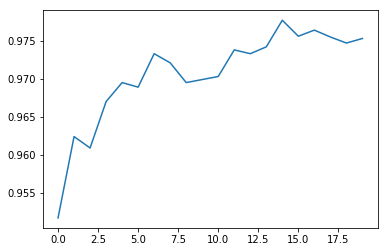

In [13]:
#plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])

In [18]:
prev = model.predict(X_test)
Y_test_matrix = [np.argmax(t) for t in Y_test]
Y_prev_matrix = [np.argmax(t) for t in prev]

In [19]:
confusion = confusion_matrix(Y_test_matrix, Y_prev_matrix)
confusion

array([[ 967,    0,    2,    2,    0,    2,    5,    0,    2,    0],
       [   0, 1128,    0,    0,    0,    2,    2,    0,    3,    0],
       [   2,    2, 1012,    6,    2,    0,    1,    5,    2,    0],
       [   0,    0,    4,  981,    0,   12,    0,    5,    5,    3],
       [   0,    0,    2,    0,  965,    0,    4,    1,    1,    9],
       [   2,    1,    0,    7,    1,  872,    2,    2,    3,    2],
       [   5,    4,    1,    1,    2,    6,  934,    0,    5,    0],
       [   0,    4,    8,    0,    3,    0,    1, 1009,    0,    3],
       [   9,    4,    4,    2,    5,   12,    1,    4,  929,    4],
       [   2,    7,    0,    5,   22,    9,    2,    4,    2,  956]],
      dtype=int64)